In [7]:
! pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.1 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32194 sha256=b6722bd05be63bcd7750f5370ce60d2dc396cfad12d390891eec9ae177b3ef51
  Stored in directory: /root/.cache/pip/wheels/a6/1c/91/32f7a6b0a9d6bbcef17a7fc0d065f9a9b8d9904551b377b64d
Successfully built jcopml


In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load data
data = pd.read_excel('Stemming.xlsx')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Stemming'], data['LABEL'], test_size=0.1, random_state=42)

# Define the preprocessing pipeline
preprocess_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

# Create the final pipeline by combining the preprocessing pipeline and GBC
pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('gbc', GradientBoostingClassifier())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)


Accuracy: 0.8040816326530612
Classification Report:
               precision    recall  f1-score   support

       jijik       1.00      1.00      1.00        64
       marah       0.40      0.45      0.43        22
       sedih       0.64      0.64      0.64        36
      senang       0.56      0.60      0.58        40
       takut       1.00      0.68      0.81        19
    terkejut       0.98      0.98      0.98        64

    accuracy                           0.80       245
   macro avg       0.76      0.73      0.74       245
weighted avg       0.82      0.80      0.81       245



In [6]:
print("Score Data Training :", pipeline.score(X_train, y_train))
print("Score Data Testing :", pipeline.score(X_test, y_test))

Score Data Training : 0.9786460699681963
Score Data Testing : 0.8040816326530612


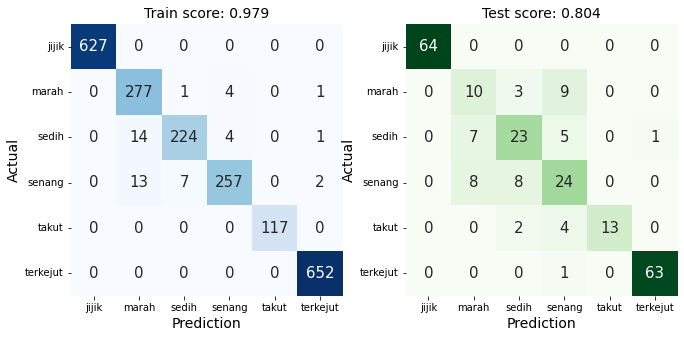

In [8]:
from jcopml.plot import plot_confusion_matrix,plot_roc_curve,plot_classification_report

plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)

In [13]:
pred_data = ['takjub bgt sih baru kenal beberapa bulan sm org baru tp bisa bikin  nangis bareng sambil pelukan sesegukan trs bareng bareng selesain masalahufufduffb kek']
prediksi = pipeline.predict(pred_data)
prediksi

array(['terkejut'], dtype=object)